# Welcome to the xarray interactive tutorial
## Importing some packages
Run the following block of code. We will be making use of the following packages
- numpy: library for creating and manipulating arrays
- scipy: library for manipulating arrays
- matplotlib: library for plotting arrays
- xarray: library for labelling and interacting with arrays
The following block of code will import the packages, it may take a few seconds to complete.

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import xarray as xr

Matplotlib is building the font cache; this may take a moment.


# Creating the noise array
## numpy

In [9]:
Nx = 31
Ny = 21
Nc = 3
noise_src = np.random.random([Nx, Ny, Nc])
display(noise_src)

array([[[0.13996626, 0.25347365, 0.46739698],
        [0.34475431, 0.34564942, 0.01430591],
        [0.02023034, 0.62665402, 0.3394409 ],
        ...,
        [0.21413769, 0.7276127 , 0.01316757],
        [0.91658034, 0.29965862, 0.15142521],
        [0.18010625, 0.49296644, 0.46575018]],

       [[0.16007674, 0.2108945 , 0.74172242],
        [0.47706648, 0.0181706 , 0.83568834],
        [0.3167515 , 0.29579705, 0.27919731],
        ...,
        [0.26055536, 0.70964632, 0.61468341],
        [0.73118149, 0.46826641, 0.46234291],
        [0.25819429, 0.82007688, 0.71250369]],

       [[0.23254675, 0.05628541, 0.87434904],
        [0.11190428, 0.65771791, 0.11340887],
        [0.49214897, 0.08031223, 0.03561143],
        ...,
        [0.67909148, 0.81797528, 0.08558178],
        [0.26799261, 0.07319954, 0.99826867],
        [0.39167548, 0.59669412, 0.24355671]],

       ...,

       [[0.36590383, 0.43684598, 0.73207804],
        [0.78820299, 0.06681365, 0.36848021],
        [0.72591145, 0

## xarray

In [11]:
width = 3
height = 2
wcoord = np.linspace(0, width, Nx)
hcoord = np.linspace(0, height, Ny)
ccoord = ['red','green','blue']
noise = xr.DataArray(noise_src, dims=["w","h","c"],coords = [wcoord, hcoord,ccoord])
display(noise)

<xarray.DataArray (w: 31, h: 21, c: 3)> Size: 16kB
array([[[0.13996626, 0.25347365, 0.46739698],
        [0.34475431, 0.34564942, 0.01430591],
        [0.02023034, 0.62665402, 0.3394409 ],
        ...,
        [0.21413769, 0.7276127 , 0.01316757],
        [0.91658034, 0.29965862, 0.15142521],
        [0.18010625, 0.49296644, 0.46575018]],

       [[0.16007674, 0.2108945 , 0.74172242],
        [0.47706648, 0.0181706 , 0.83568834],
        [0.3167515 , 0.29579705, 0.27919731],
        ...,
        [0.26055536, 0.70964632, 0.61468341],
        [0.73118149, 0.46826641, 0.46234291],
        [0.25819429, 0.82007688, 0.71250369]],

       [[0.23254675, 0.05628541, 0.87434904],
        [0.11190428, 0.65771791, 0.11340887],
        [0.49214897, 0.08031223, 0.03561143],
        ...,
...
        ...,
        [0.08455122, 0.63253121, 0.3817275 ],
        [0.96849654, 0.23709014, 0.19471521],
        [0.57628109, 0.27218816, 0.43711129]],

       [[0.64757493, 0.18863566, 0.7195656 ],
        [0.25471519, 0.05370001, 0.54168434],
        [0.73034921, 0.48351994, 0.02190837],
        ...,
        [0.71692857, 0.28693214, 0.68909878],
        [0.98618361, 0.00876189, 0.7862598 ],
        [0.48579172, 0.24855801, 0.77008788]],

       [[0.21161553, 0.78006882, 0.61234003],
        [0.36783914, 0.31927899, 0.97227758],
        [0.36506715, 0.53968288, 0.59215706],
        ...,
        [0.78891367, 0.88184764, 0.08391939],
        [0.60891195, 0.67642042, 0.74842096],
        [0.10348682, 0.3335597 , 0.68413568]]])
Coordinates:
  * w        (w) float64 248B 0.0 0.1 0.2 0.3 0.4 0.5 ... 2.6 2.7 2.8 2.9 3.0
  * h        (h) float64 168B 0.0 0.1 0.2 0.3 0.4 0.5 ... 1.6 1.7 1.8 1.9 2.0
  * c        (c) <U5 60B 'red' 'green' 'blue'

# Displaying the image
## numpy and matplotlib

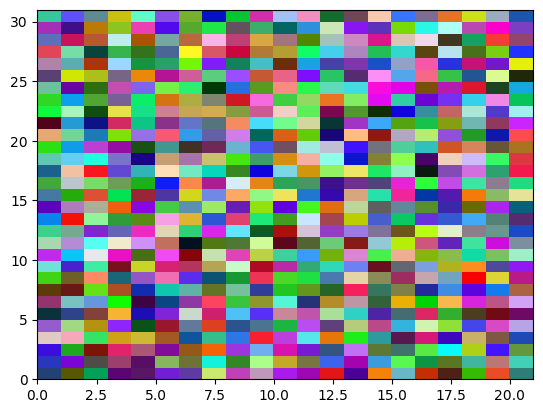

In [14]:
plt.pcolor(noise_src)
plt.show()

## with xarray

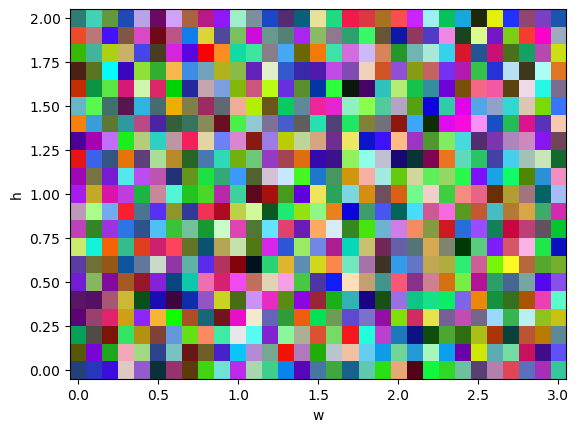

In [18]:
noise.plot.imshow(x="w")
plt.show()

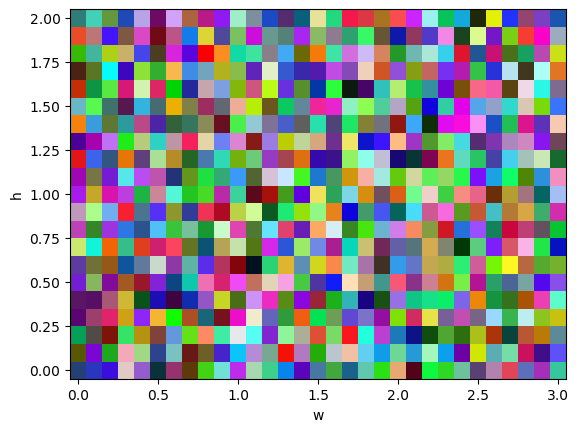

In [31]:
plt.pcolor(wcoord, hcoord, np.transpose(noise_src, axes=[1,0,2]))
plt.ylabel("h")
plt.xlabel("w")
plt.show()

# Plotting RGB components
## With numpy + matplotlib

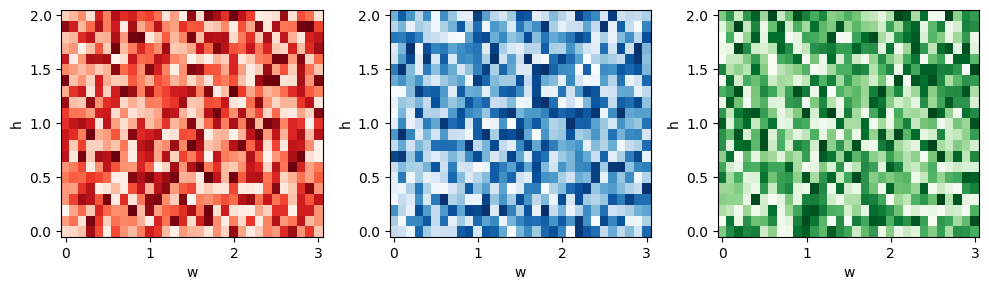

In [62]:
fig, axs = plt.subplots(1,3, figsize=(10,3))
colors = ["Reds","Blues","Greens"]
for i in range(3):
    axs[i].pcolor(wcoord, hcoord, noise_src[:,:,i].T,cmap=colors[i])
    axs[i].set_ylabel("h")
    axs[i].set_xlabel("w")
plt.tight_layout()
plt.show(fig)

## xarray

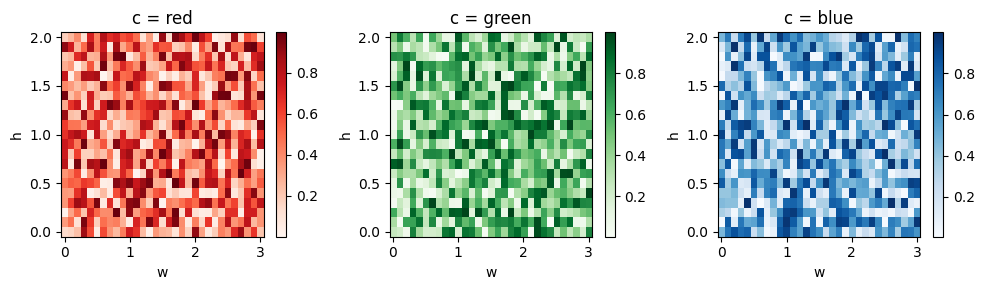

In [65]:
fig, axs = plt.subplots(1,3, figsize=(10,3))
colors = ["Reds","Greens","Blues"]
noise[:,:,0].plot.imshow(x="w",ax=axs[0],cmap=colors[0])
noise.sel(c="green").plot.imshow(x="w",ax=axs[1],cmap=colors[1])
noise.isel(c=2).plot.imshow(x="w",ax=axs[2],cmap=colors[2])
plt.tight_layout()
plt.show(fig)

## Making a component plotting function out of xarray

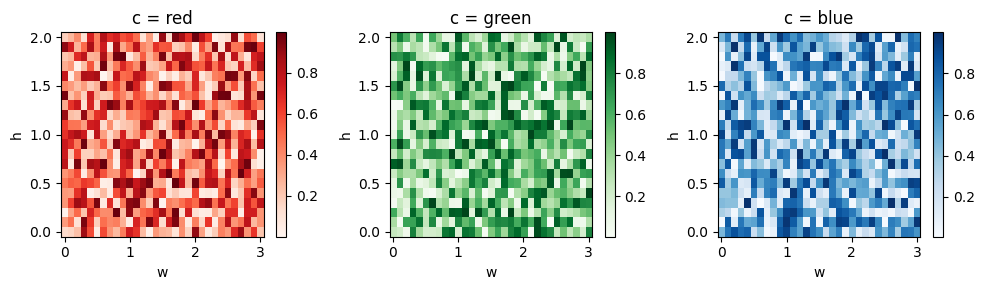

In [67]:
def plot_comp(arr):
    fig, axs = plt.subplots(1,3, figsize=(10,3))
    colors = ["Reds","Greens","Blues"]
    arr[:,:,0].plot.imshow(x="w",ax=axs[0],cmap=colors[0])
    arr.sel(c="green").plot.imshow(x="w",ax=axs[1],cmap=colors[1])
    arr.isel(c=2).plot.imshow(x="w",ax=axs[2],cmap=colors[2])
    plt.tight_layout()
    plt.show(fig)    
plot_comp(noise)

# Smoothing out noise

In [83]:
Nx_new = 301
Ny_new = 201
new_wcoord = np.linspace(0,width,Nx_new)
new_hcoord = np.linspace(0,height,Ny_new)

## Interpolating onto higher resolution grid

In [84]:
smooth = noise.interp(w=new_wcoord,h=new_hcoord,method="cubic")
display(smooth)

<xarray.DataArray (w: 301, h: 201, c: 3)> Size: 1MB
array([[[0.13996654, 0.25347393, 0.46739682],
        [0.23844385, 0.19855764, 0.35307018],
        [0.31451836, 0.16309888, 0.25726167],
        ...,
        [0.57571331, 0.27827744, 0.40369881],
        [0.39759196, 0.37067262, 0.43524104],
        [0.18010662, 0.49296699, 0.46575002]],

       [[0.17410932, 0.31408212, 0.49062812],
        [0.30448699, 0.20786385, 0.44628637],
        [0.40602896, 0.12919156, 0.40849474],
        ...,
        [0.59539109, 0.3700195 , 0.37529373],
        [0.39587484, 0.44891925, 0.47395291],
        [0.15064176, 0.5540266 , 0.59102987]],

       [[0.19788465, 0.35467781, 0.51578296],
        [0.3507515 , 0.21189254, 0.52772714],
        [0.47036643, 0.10215109, 0.53635064],
        ...,
...
        ...,
        [0.31549729, 0.35307615, 1.01668108],
        [0.23485921, 0.31352286, 0.95335571],
        [0.14469254, 0.26630002, 0.86387744]],

       [[0.35792064, 0.62648012, 0.60136422],
        [0.34645754, 0.54671562, 0.67371404],
        [0.33476193, 0.48025842, 0.73683229],
        ...,
        [0.28009132, 0.36161404, 0.94802929],
        [0.20424079, 0.32916936, 0.88109022],
        [0.12005511, 0.29548993, 0.78819832]],

       [[0.21161596, 0.78006968, 0.61233982],
        [0.27180099, 0.67417923, 0.68567095],
        [0.31858333, 0.58430856, 0.75032697],
        ...,
        [0.25211413, 0.36463801, 0.84941788],
        [0.18144407, 0.34524031, 0.77924459],
        [0.10348703, 0.33356007, 0.68413544]]])
Coordinates:
  * c        (c) <U5 60B 'red' 'green' 'blue'
  * w        (w) float64 2kB 0.0 0.01 0.02 0.03 0.04 ... 2.96 2.97 2.98 2.99 3.0
  * h        (h) float64 2kB 0.0 0.01 0.02 0.03 0.04 ... 1.96 1.97 1.98 1.99 2.0

## Visualize before and after

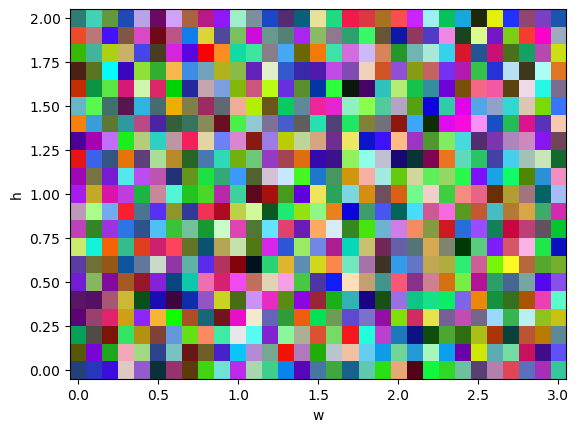

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


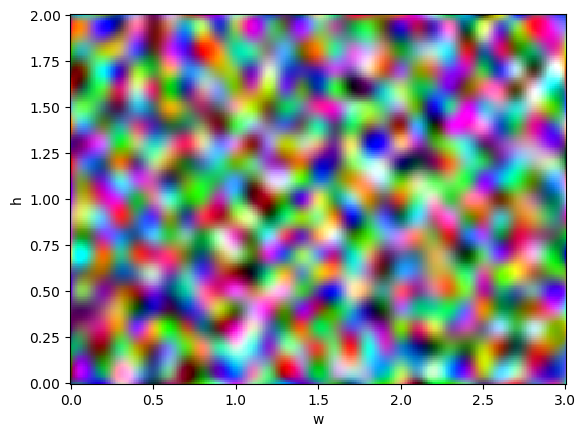

In [90]:
noise.plot.imshow(x="w")
plt.show()
smooth.plot.imshow(x="w")
plt.show()

## Visualizing components before and after

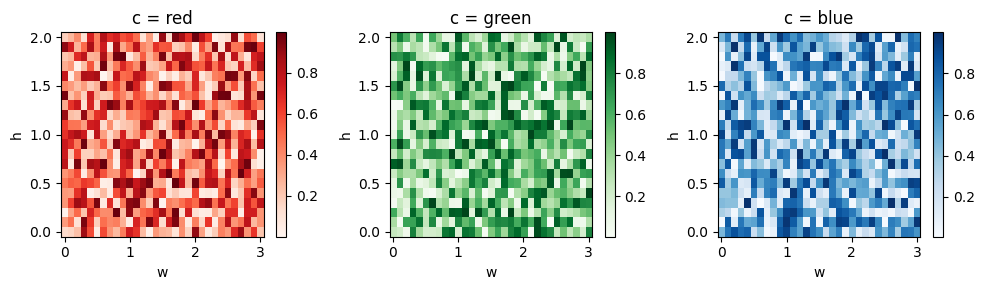

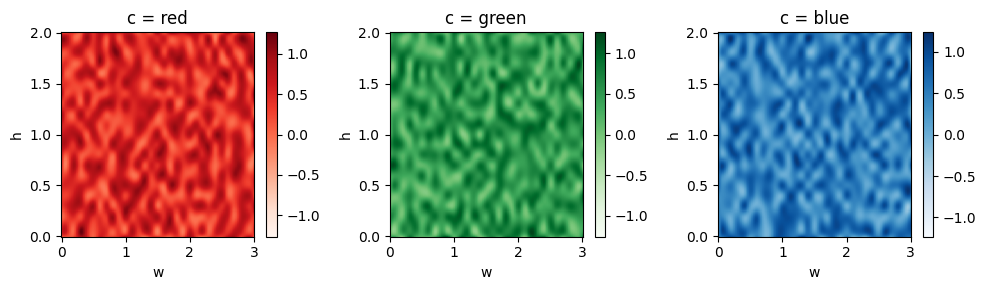

In [91]:
plot_comp(noise)
plot_comp(smooth)

## What did interpolation do?

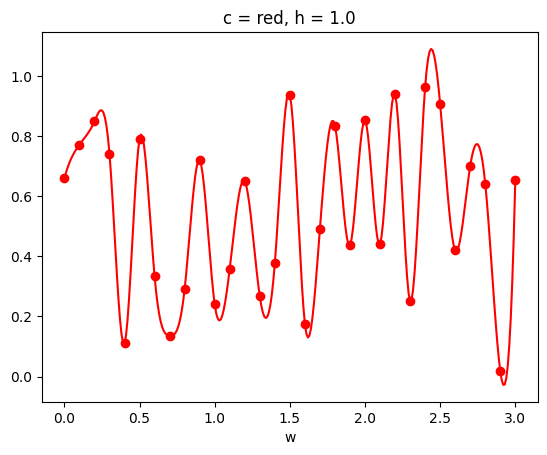

In [92]:
noise.sel(h=1,c='red').plot.scatter(color="red")
smooth.sel(h=1,c='red').plot(color="red")

# Transforming the smooth array

In [127]:
tform = smooth.copy()

## Transforming the whole array

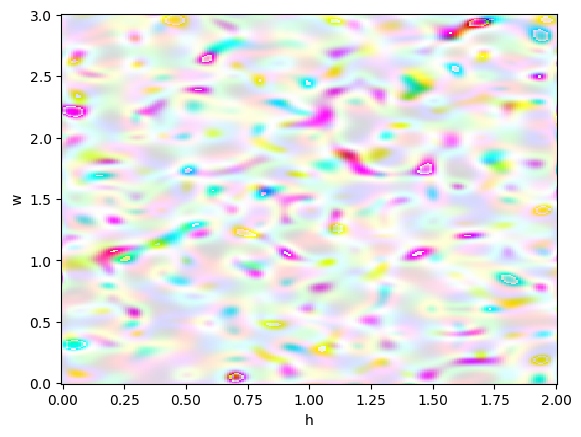

In [128]:
tform = np.sin(np.exp(tform**2)) % 1

tform.plot.imshow(x="h")

## Transforming part of the array

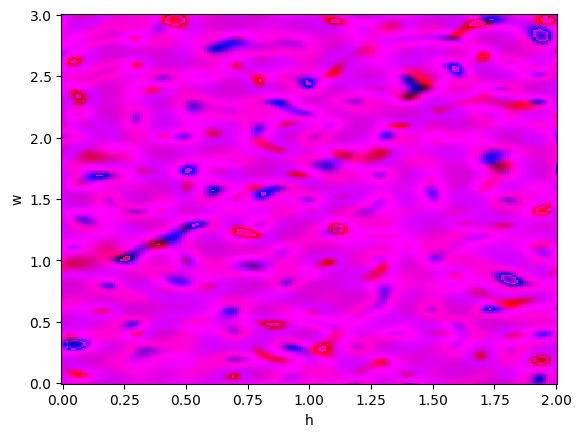

In [129]:
tform.loc[{"c":"green"}] = 0
tform.plot.imshow(x="h")

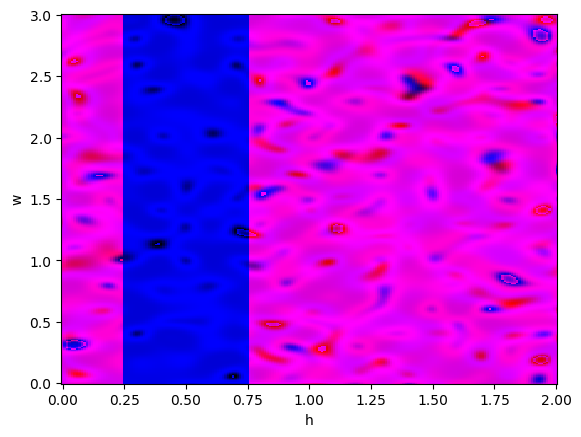

In [130]:
tform.loc[{"h":slice(0.25,0.75), "c":"red"}] = 0
tform.plot.imshow(x="h")